In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.special import expit as logistic
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
ff_df = pd.read_csv("fossil-fuel-consumption-by-type.csv ")

us_ff_df = ff_df[ff_df['Entity'] == 'United States']
#us_ff_df = us_ff_df.drop(us_ff_df.columns[[0,1]], axis=1, inplace=True)
                   

In [3]:
us_ff_df.head()

,Entity,Code,Year,Oil Consumption - TWh,Gas Consumption - TWh,Coal Consumption - TWh
5781,United States,USA,1965,6414.477051,4159.206055,3224.244141
5782,United States,USA,1966,6731.245117,4482.756348,3380.846191
5783,United States,USA,1967,6988.793945,4733.188477,3316.996582
5784,United States,USA,1968,7457.960938,5066.814941,3433.076416
5785,United States,USA,1969,7831.837891,5454.106934,3447.237549


In [4]:
total__ffdf =us_ff_df
total__ffdf['Total Fossil fuel Consumption - TWh']  = us_ff_df.iloc[:, [3,4, 5]].sum(axis = 1) 
total__ffdf['Total Fossil fuel Consumption - quads']  = total__ffdf['Total Fossil fuel Consumption - TWh']*0.0034121416331279 
total__ffdf.head()

C:\Users\kitor\AppData\Local\Temp\ipykernel_14144\1772378363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total__ffdf['Total Fossil fuel Consumption - TWh']  = us_ff_df.iloc[:, [3,4, 5]].sum(axis = 1)
C:\Users\kitor\AppData\Local\Temp\ipykernel_14144\1772378363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total__ffdf['Total Fossil fuel Consumption - quads']  = total__ffdf['Total Fossil fuel Consumption - TWh']*0.0034121416331279


,Entity,Code,Year,Oil Consumption - TWh,Gas Consumption - TWh,Coal Consumption - TWh,Total Fossil fuel Consumption - TWh,Total Fossil fuel Consumption - quads
5781,United States,USA,1965,6414.477051,4159.206055,3224.244141,13797.927246,47.080482
5782,United States,USA,1966,6731.245117,4482.756348,3380.846191,14594.847656,49.799687
5783,United States,USA,1967,6988.793945,4733.188477,3316.996582,15038.979004,51.315126
5784,United States,USA,1968,7457.960938,5066.814941,3433.076416,15957.852295,54.450452
5785,United States,USA,1969,7831.837891,5454.106934,3447.237549,16733.182373,57.095988


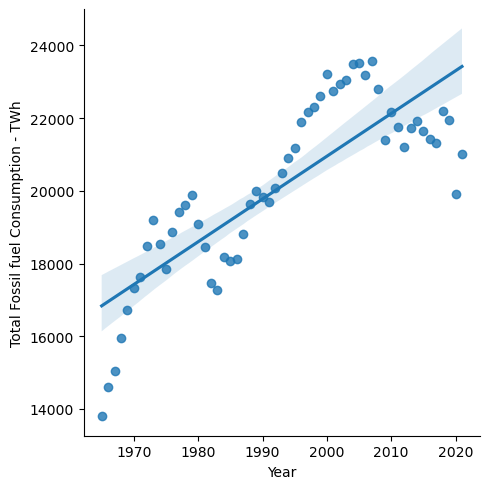

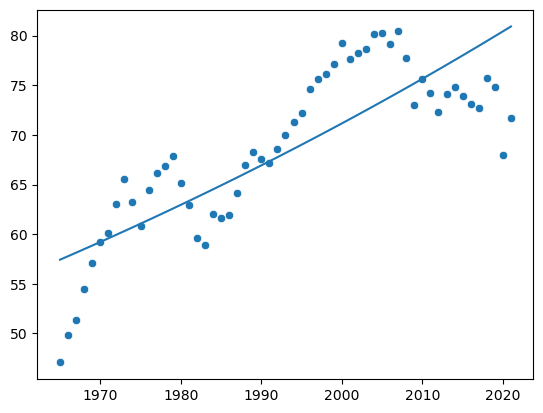

In [5]:
x = pd.array(total__ffdf ['Year'])
y = pd.array(total__ffdf ['Total Fossil fuel Consumption - quads'])

sns.lmplot(data = total__ffdf, x = 'Year', y = 'Total Fossil fuel Consumption - quads')
plt.show()

curve = np.polyfit(x, np.log(y), 1)
x_new = np.linspace(np.min(x), np.max(x))
y_new = np.exp(curve[1]) * np.exp(curve[0] * x_new)

sns.scatterplot(data=total__ffdf, x= x, y= y)
plt.plot(x_new, y_new)
plt.show()

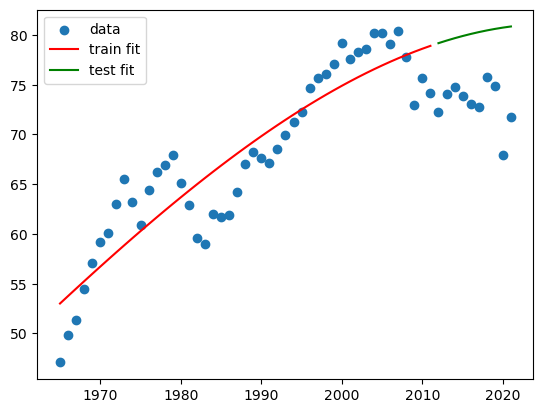


coef =  [-4.94682391e+02  2.54266770e-01 -4.34950614e-05] 
intercept =  320333.08637112624 
train RMSE =  3.516426450292189 
test RMSE =  7.383173433039741 
train MAE =  3.086170363779163 
test MAE =  7.007372680783929


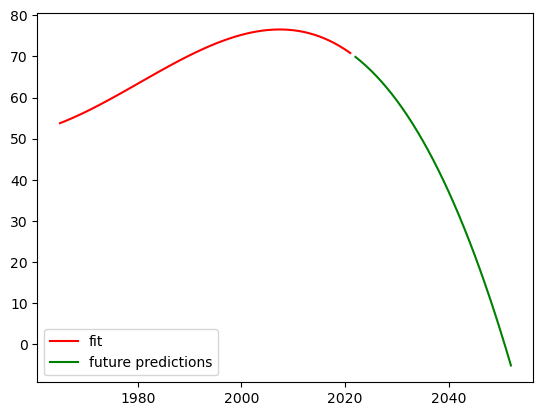

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.57e-20
Time:                        19:57:43   Log-Likelihood:                -153.38
No. Observations:                  57   AIC:                             312.8
Df Residuals:                      54   BIC:                             318.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0384      0.006     -6.379      0.0

In [9]:
x = pd.array(total__ffdf ['Year'])
y = pd.array(total__ffdf ['Total Fossil fuel Consumption - quads'])

polynom = PolynomialFeatures(degree=3, include_bias=False)

xFit = polynom .fit_transform(x.reshape(-1,1)) 
xTrain = xFit [:-10]
yTrain = y[:-10]
xTest = xFit [-10:]
yTest = y[-10:]

model_2 = LinearRegression().fit(xTrain, yTrain)
preditTrain = model_2.predict(xTrain)
predictTest = model_2.predict(xTest)


plt.scatter(x, y, label = "data")
plt.plot(x[:-10], preditTrain, c="red", label = "train fit")
plt.plot(x[-10:], predictTest, c = "green", label = "test fit")
plt.legend(loc='best')
plt.show()

mse_train = mean_squared_error(yTrain, preditTrain)
mse_test = mean_squared_error(yTest, predictTest)
mae_train = mean_absolute_error(yTrain, preditTrain)
mae_test = mean_absolute_error(yTest, predictTest)
    
print('\ncoef = ', model_2.coef_, '\nintercept = ', model_2.intercept_, '\ntrain RMSE = ', np.sqrt(mse_train),\
        '\ntest RMSE = ', np.sqrt(mse_test), '\ntrain MAE = ', mae_train,'\ntest MAE = ', mae_test)

model = LinearRegression().fit(xFit, y)
y_predicted = model.predict(xFit)

years = np.linspace(2022, 2052, 31)
years_res = polynom.fit_transform(years.reshape(-1,1))
new_pred = model.predict(years_res)

plt.plot(x, y_predicted, c="red", label = "fit")
plt.plot(years, new_pred, c = "green", label = "future predictions")
plt.legend(loc='best')
plt.show()

future_df = pd.DataFrame([])
future_df['Year'] = years
future_df['Total Fossil fuel Consumption - quads'] = new_pred
total_df = pd.concat([total__ffdf, future_df])

x_up = xFit.tolist()
y_up = y.tolist()
x_up = sm.add_constant(x_up)
 
result = sm.OLS(y_up, x_up).fit()
print(result.summary())


In [10]:
consumption_df = pd.read_csv("consumption.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'consumption.csv'